In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Число колонок в представленном датафрэйме, а число строк, Тип float имеют  колонки, int - , и object 

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# У какой доли студентов из датасэта в колонке lunch указано free/reduced?
# Формат ответа десятичная дробь, например, 0.25
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df.lunch.value_counts('free/reduced')[1]


0.355

In [20]:
# Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
"mean: free/reduced"
df.loc[(df.lunch == 'free/reduced')].mean()
"mean: standard"
df.loc[(df.lunch == 'standard')].mean()
"var: free/reduced"
df.loc[(df.lunch == 'free/reduced')].var()
"var: standard"
df.loc[(df.lunch == 'standard')].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

In [15]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [36]:
# Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), 
# и заполните их число в задании ниже.

df_dota =pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head(5)
df_dota.groupby('legs').count()

# Продолжим исследование героев Dota2. 
# Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.
df_dota.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [33]:
# К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи!
# Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, 
# указывая исполнителя с большим заработком в каждой из категорий.

df_Loopa = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_Loopa.head(10)
df_Loopa.groupby(['Executor', 'Type']).\
        aggregate('Salary').mean()

Executor  Type
Loopa     A        58.000000
          B       145.166667
          C       154.333333
          D       137.714286
          E       164.000000
          F       238.000000
Pupa      A       160.833333
          B        77.000000
          C        74.500000
          D       146.500000
          E       131.200000
          F       136.250000
Name: Salary, dtype: float64

In [56]:
# Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. 
# В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), 
# группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

# Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! 
# Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, 
# сохранив результат в переменной mean_concentrations.
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv') 
mean_concentrations = concentrations.groupby("genus").mean()


# Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, 
# средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. 
# Округлите до 2-ого знака, десятичным разделителем является точка.

concentrations.head(5)
df = concentrations.groupby('genus').describe()[('alanin')]
df['min'].round(2)
df['mean'].round(2)
df['max'].round(2)

# 0.35 3.57 6.64


genus
Ascophyllum    0.88
Cladophora     6.88
Fucus          6.64
Palmaria       3.18
Saccharina     5.79
Name: max, dtype: float64

In [71]:
# Представьте, что у вас есть датафрэйм df, 
# хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

# Укажите верные способы, как отрисовать простой график зависимости зарплаты 
# от даты (то, как отображается дата сейчас не важно, главное сам график)
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

# sns.lineplot(x=df.index, y=df.income)
# df['income'].plot()
# df.plot()
# df.plot(kind='line')
# sns.lineplot(data=df)
# plt.plot(df.index, df.income)
# df.income.plot()

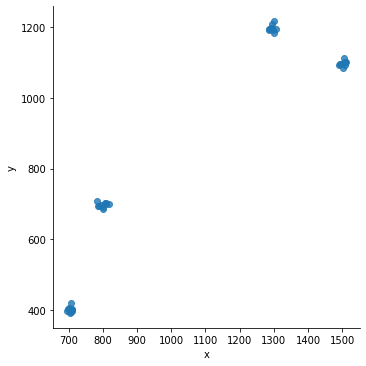

In [78]:
# Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) 
# в пространстве этих 2-ух переменных 
# (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.
df = pd.read_csv('dataset_209770_6.txt', sep=" ")
# df.plot.scatter(x='x', y='y')
sns.lmplot(x='x', y='y', data=df, fit_reg=False)

# df = pd.read_csv('path_to_dataset', sep=' ', header=None)
# sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

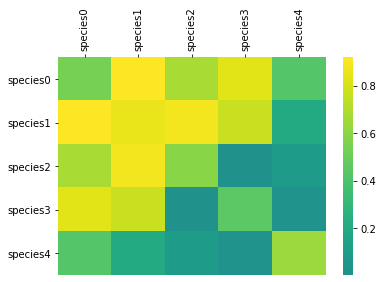

In [81]:
# Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, 
# чтобы различия было видно наглядно. 
# В ответ впишите, какая картинка соответствует скачанным данным.
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col = 0)
heatmap_plot = sns.heatmap(df, center=0, cmap='viridis')
heatmap_plot.xaxis.set_ticks_position('top')
heatmap_plot.xaxis.set_tick_params(rotation=90)


In [87]:
# Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. 
# Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их 
# возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким 
# героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col = 0)
df
df['Number'] = df.roles.apply(lambda x: len(x.split()))
df.mean()

id        60.00000
legs       2.08547
Number     4.00000
dtype: float64